In [25]:
import tensorflow as tf
import numpy as np
import csv

from keras.models import Sequential
from keras.layers import Input,Dense
from keras.models import Model

import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
DataFileTraining='X.csv'
rows=200
columns=5
data=np.zeros([1001,columns])
encoding_dim=2

In [27]:
cont=0;
with open(DataFileTraining) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        data[cont,:]=(np.asarray(row))              
        cont=cont+1
        
#print(data[0:10,:])
#print(max(data[:,4]))
#print(min(data[:,4]))

In [28]:
#Normalization
DataTrainN=np.zeros([rows,columns])
for i in range(0,5):
    for j in range(0,rows):
        DataTrainN[j,i]=2*((data[j,i]-min(data[:,i]))/(max(data[:,i])-min(data[:,i])))+(-1)

print(DataTrainN.shape)
DataTrainN=np.transpose(DataTrainN)
print(DataTrainN.shape)

(200, 5)
(5, 200)


In [29]:
inputData = Input(shape=(rows,))
print(inputData.shape)
encoded = Dense(200, activation='tanh')(inputData)
encoded = Dense(100, activation='tanh')(encoded)
encoded = Dense(3, activation='linear')(encoded)

decoded = Dense(100, activation='tanh')(encoded)
decoded = Dense(200, activation='tanh')(decoded)
decoded = Dense(rows, activation='linear')(decoded)

"""
AE=Sequential([
    Dense(200, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(2, activation='linear'),
    Dense(100, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(1001, activation='linear')
])
"""

(None, 200)


"\nAE=Sequential([\n    Dense(200, activation='tanh'),\n    Dense(100, activation='tanh'),\n    Dense(2, activation='linear'),\n    Dense(100, activation='tanh'),\n    Dense(200, activation='tanh'),\n    Dense(1001, activation='linear')\n])\n"

In [30]:
decoder = Model(encoded, decoded)

In [31]:
#training
AE= Model(inputData, decoded)

AE.summary()
AE.compile(optimizer='sgd', loss='mean_squared_error')

AE.fit(DataTrainN, DataTrainN,
                epochs=30000,
                )

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 27502/30000
1/1 [==============================] - 0s 14ms/step - loss: 0.0050
Epoch 27503/30000
1/1 [==============================] - 0s 16ms/step - loss: 0.0050
Epoch 27504/30000
1/1 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 27505/30000
1/1 [==============================] - 0s 12ms/step - loss: 0.0050
Epoch 27506/30000
1/1 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 27507/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 27508/30000
1/1 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 27509/30000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050
Epoch 27510/30000
1/1 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 27511/30000
1/1 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 27512/30000
1/1 [==============

In [32]:
encoder = Model(inputData, encoded)

(5, 3)


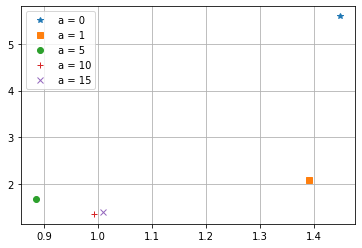

In [33]:
encodedRes = encoder.predict(DataTrainN)
"""
decodedRes = decoder.predict(encodedRes)

n = 5  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.plot(DataTrainN[n,:])

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decodedRes[n,:])
plt.show()
"""
print(encodedRes.shape)
plt.plot(encodedRes[0,0],encodedRes[0,1],'*',label='a = 0')
plt.plot(encodedRes[1,0],encodedRes[1,1],'s',label='a = 1')
plt.plot(encodedRes[2,0],encodedRes[2,1],'o',label='a = 5')
plt.plot(encodedRes[3,0],encodedRes[3,1],'+',label='a = 10')
plt.plot(encodedRes[4,0],encodedRes[4,1],'x',label='a = 15')
plt.legend()
plt.grid()
plt.savefig('nonlinear_latent.pdf',format='pdf')
plt.show()

In [34]:
decoded_imgs = AE.predict(DataTrainN)
print(decoded_imgs.shape)

(5, 200)


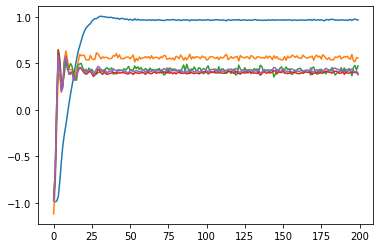

In [35]:
#normalized reconstruction
plt.plot(np.transpose(decoded_imgs))
plt.show()

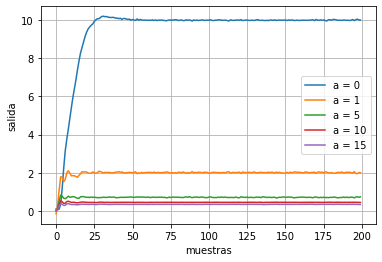

In [36]:
#denormalization
DataRes=np.zeros([rows,columns])
DataNorm=np.transpose(decoded_imgs)
for i in range(0,5):
    for j in range(0,rows):
        DataRes[j,i]=(((max(data[:,i])-min(data[:,i]))*(DataNorm[j,i]+1))/2)+min(data[:,i])

#print(DataRes)
plt.plot(DataRes[0:200,0], label='a = 0')
plt.plot(DataRes[0:200,1], label='a = 1')
plt.plot(DataRes[0:200,2], label='a = 5')
plt.plot(DataRes[0:200,3], label='a = 10')
plt.plot(DataRes[0:200,4], label='a = 15')
plt.legend()
plt.grid()
plt.xlabel("muestras")
plt.ylabel("salida")
plt.savefig('gen_nonlinear-sys.pdf',format='pdf')
plt.show()

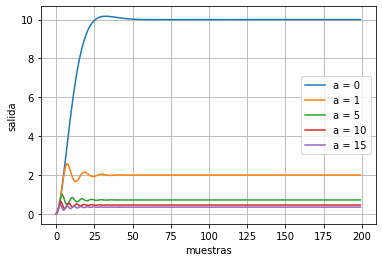

In [37]:
plt.plot(data[0:200,0], label='a = 0')
plt.plot(data[0:200,1], label='a = 1')
plt.plot(data[0:200,2], label='a = 5')
plt.plot(data[0:200,3], label='a = 10')
plt.plot(data[0:200,4], label='a = 15')
plt.legend()
plt.grid()
plt.xlabel("muestras")
plt.ylabel("salida")
plt.savefig('nonlinear-sys.pdf',format='pdf')
plt.show()

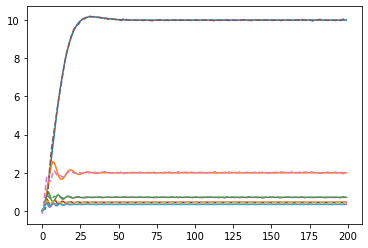

In [38]:
#plt.plot(data[0:200,:])
#plt.plot(DataRes[0:200,:],'--')

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

fig, ax = plt.subplots()
lines = []
lines = plt.plot(data[0:200,:],label='Original Data')
lines=lines+plt.plot(DataRes[0:200,:],'--',label='Data Generated')



plt.show()

(5, 3)


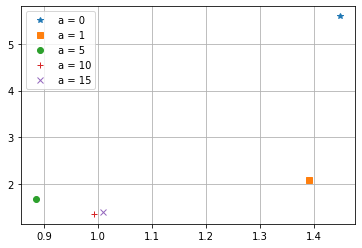

In [39]:
encodedRes = encoder.predict(DataTrainN)

print(encodedRes.shape)
plt.plot(encodedRes[0,0],encodedRes[0,1],'*',label='a = 0')
plt.plot(encodedRes[1,0],encodedRes[1,1],'s',label='a = 1')
plt.plot(encodedRes[2,0],encodedRes[2,1],'o',label='a = 5')
plt.plot(encodedRes[3,0],encodedRes[3,1],'+',label='a = 10')
plt.plot(encodedRes[4,0],encodedRes[4,1],'x',label='a = 15')

plt.legend()
plt.grid()
plt.savefig('tested_nonlinear_codes.pdf',format='pdf')
plt.show()

In [40]:
decoder_response1 = decoder.predict([[3,6]])
decoder_response2 = decoder.predict([[-1.6,3]])
decoder_response3 = decoder.predict([[-1.2,6]])
decoder_response4 = decoder.predict([[1,4]])
decoder_response5 = decoder.predict([[-0.7,1]])


plt.plot(encodedRes[0,0],encodedRes[0,1],'*',label='a = 0')
plt.plot(encodedRes[1,0],encodedRes[1,1],'s',label='a = 1')
plt.plot(encodedRes[2,0],encodedRes[2,1],'o',label='a = 5')
plt.plot(encodedRes[3,0],encodedRes[3,1],'+',label='a = 10')
plt.plot(encodedRes[4,0],encodedRes[4,1],'x',label='a = 15')

plt.plot(3,6,'k^')
plt.text(3,6,'1')
plt.plot(-1.6,3,'k^')
plt.text(-1.6,3,'2')
plt.plot(-1.2,6,'k^')
plt.text(-1.2,6,'3')
plt.plot(1,4,'k^')
plt.text(1,4,'4')
plt.plot(-0.7,1,'k^')
plt.text(-0.7,1,'5')

plt.legend()
plt.grid()
plt.savefig('tested_nonlinear_codes.pdf',format='pdf')
plt.show()





new_gen = np.zeros((5,200))

new_gen[0,:] = decoder_response1
new_gen[1,:] = decoder_response2
new_gen[2,:] = decoder_response3
new_gen[3,:] = decoder_response4
new_gen[4,:] = decoder_response5



#denormalization
DataReconstruction=np.zeros([rows,columns])
DataNorm_new=np.transpose(new_gen)
for i in range(0,5):
    for j in range(0,rows):
        DataReconstruction[j,i]=(((max(data[:,i])-min(data[:,i]))*(DataNorm_new[j,i]+1))/2)+min(data[:,i])

plt.plot(DataReconstruction[0:200,0], label='1',color='black')


plt.grid()
plt.legend()
plt.savefig('nl_gen_code1.pdf',format='pdf')
plt.show()

ValueError: ignored

In [ ]:
plt.plot(DataReconstruction[0:200,1], label='2',color='black')


plt.grid()
plt.legend()
plt.savefig('nl_gen_code2.pdf',format='pdf')
plt.show()

In [ ]:
plt.plot(DataReconstruction[0:200,2], label='3',color='black')


plt.grid()
plt.legend()
plt.savefig('nl_gen_code3.pdf',format='pdf')
plt.show()

In [ ]:
plt.plot(DataReconstruction[0:200,3], label='4',color='black')


plt.grid()
plt.legend()
plt.savefig('nl_gen_code4.pdf',format='pdf')
plt.show()

In [ ]:
plt.plot(DataReconstruction[0:200,4], label='5',color='black')

plt.grid()
plt.legend()
plt.savefig('nl_gen_code5.pdf',format='pdf')
plt.show()